# Avaliação 3
## FSC5705 - Física Computacional

Use as células abaixo das questões, não crie células novas. Também, não modifique o que já está programado, apenas escreva o seu código substituindo a região marcada por:

```
# YOUR CODE HERE
raise NotImplementedError()
```

### Questão 1

Considere a equação

$$
x = 1 - \mathrm{e}^{-cx},
$$

onde $c$ é um parâmetro conhecido e $x$ desconhecido. Esta equação surge em diversas situações, incluindo na física de processos de contato.

**a (2 pontos)** Resolva esta equação para $x$ usando o método do ponto fixo, no caso em que $c = 2$. Estime a solução com uma precisão de $10^{-6}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,c):
    return 1.0 - np.exp(-c*x)

def ponto_fixo(f, x0, epsilon, N, c):
    
    x1 = x0
    delta1 = 1.0
    for n in range(N):
        x2 = f(x1,c)
        delta2 = x2 - x1
        epsilon2 = delta2**2 / (delta2 - delta1)
        if np.abs(epsilon2) < epsilon:
            break
        else:
            x1 = x2
            delta1 = delta2
    return x2

x0 = 0.5
epsilon = 1e-6
N = 100
c = 2
x = ponto_fixo(f, x0, epsilon, N, c)
print(f'A solução para x é {x:.6f}.')

A solução para x é 0.796811.


**b (2 pontos)** Calcule a solução agora variando $c$ entre $0$ e $3$, em passos de $0.01$. Faça um gráfico de $x$ em função de $c$. Você deverá ver uma transição clara entre um regime em que $x = 0$ e outro em que $x \neq 0$. Este é um exemplo importante de transição de fase – na Física, esta transição é cohecida como *transição de percolação*.

*Nota: é possível que em alguns pontos a equação demore bastante para convergir. Use um $N$ grande o suficiente para que a curva não apresente descontinuidades (exceto a própria transição de fase).*

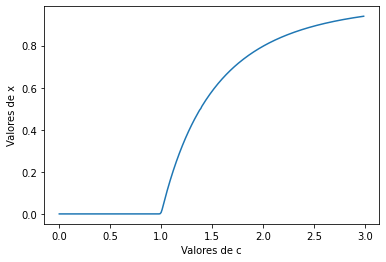

In [3]:
#Usando as funções anteriores

x0 = 0.5
epsilon = 1e-6
N = 300
c = np.arange(0,3,0.01)

x = []
for it in c:
    x.append(ponto_fixo(f, x0, epsilon, N, it))

fig, axes = plt.subplots()
axes.plot(c, x)
axes.set_xlabel('Valores de c')  
axes.set_ylabel('Valores de x')
plt.show()

### Questão 2

Considere o polinômio de Legendre de sexta ordem, mapeado em $0 \leq x \leq 1$.

$$
P_6(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1.
$$

As raízes deste polinômio são os pontos de amostragem do método de integração da quadratura gaussiana, com $N = 6$.  Não existe uma fórmula geral para encontrar as raízes de um polinômio de sexta ordem, mas podemos encontrá-las facilmente usando um computador. O Método de Newton é muito usado para determinar as raízes deste tipo de polinômio.

**a. (2 pontos)** Faça um gráfico de $P_6(x)$ no intervalos $0 \leq x \leq 1$ e, de inspeção visual, guarde valores aproximados para as seis raízes desse polinômio.

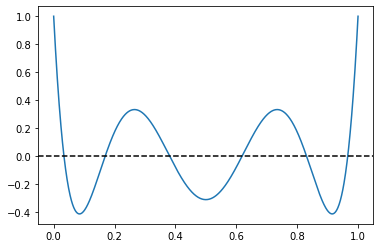

In [7]:
def P_6(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

x = np.linspace(0, 1.0, 1000)
fig, ax = plt.subplots()
ax.plot(x, P_6(x))
ax.axhline([0], ls='--', color='k')
plt.show()

R1 = 0.03
R2 = 0.17
R3 = 0.39
R4 = 0.60
R5 = 0.80
R6 = 0.95

**b. (2 pontos)** Escreva um programa que encontre essas raízes com uma precisão de 10 casas decimais, usando o método de Newton. Desenhe novamente o gráfico da função, e faça anotações no gráfico com a posição das raízes encontradas.

R1 =  0.0335761984
R2 =  0.1693944274
R3 =  0.3806006456
R4 =  0.6199177345
R5 =  0.8358676804
R6 =  0.9717071689


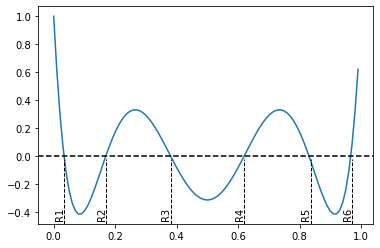

In [8]:
def P_6(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def P_6_(x):  #derivada:
    return 6*924*x**5 - 5*2772*x**4 + 4*3150*x**3 - 3*1680*x**2 + 2*420*x - 42

epsilon = 1e-12
N = 100
prs = 1e-10

def Raizes_P_6(x, N, epsilon):
    for n in range(N):
        x2 = x - (P_6(x)/ P_6_(x))
        epsilon_n = x2 - x
        x = x2
        if np.abs(epsilon_n) < prs:
            break
        return [x,n]
    
Chutes_R = [R1, R2, R3, R4, R5, R6]
Rn_vet = []
cont = 0

for i in Chutes_R:
    cont+=1
    Rn = Raizes_P_6(i,10, epsilon)
    Rn_vet.append(Rn[0])
    print(f'R{cont} = {Rn[0]: .10f}')
    
#Grafico

vet_x = np.arange(0,1,0.01)
vet_y = P_6(vet_x)
cont = 0
    
fig, ax = plt.subplots()

ax.plot(vet_x, vet_y, label='P_6(x)')
ax.axhline([0], ls='--', color='k')
for j in Rn_vet:
    cont+=1
    ax.axvline([j], lw=1.0, ls='--', color='k',ymax=0.3)
    ax.annotate(text=f'R{cont}', xy=(j-0.03, -0.44), rotation=90)

plt.show()

### Questão 3

**(2 pontos)** Use o método da secante para encontrar a solução da equação

$$
\mathrm{e}^{-x^2} = 2x.
$$

Não esqueça de fazer um `print()` do valor da solução, mostrar um gráfico da função ao redor da raiz, e fazer uma anotação da raiz no gráfico.

A solução é x = 0.4193648240191324





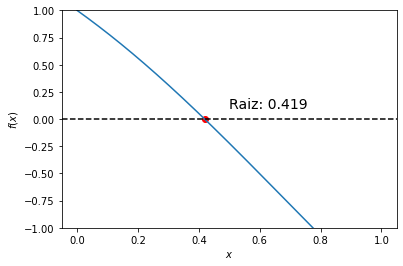

In [10]:
def f(x):
    return np.exp(-x**2) - 2*x

def secante(f, x1, x2, epsilon, N=100):
    for n in range(N):
        x3 = x2 - f(x2) * (x2 - x1) / (f(x2) - f(x1))
        delta = x3 - x2
        x1 = x2
        x2 = x3
        if np.abs(delta) < epsilon:
            break
            
    # Alertar o usuário se a solução não convergiu.
    if (n + 1) == N:
        print('AVISO: secante() não convergiu!')
    return x2

epsilon = 1e-12

x_a = secante(f, -0.5, 0.0, epsilon)
print(f'A solução é x = {x_a}\n\n\n')

x = np.linspace(0, 1.0, 100000)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.set_ylim(-1.0, 1.0)
ax.axhline([0], ls='--', color='k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$ f(x)$')
ax.scatter(x=x_a, y=0, c='r')
ax.text(0.5 , 0.1 , r'Raiz: 0.419', fontsize=14)
plt.show()